# Aula 1 - Classificação: o que é e como funciona?

## 1.1 - Apresentação


## 1.2 - Importando os dados

In [5]:
import pandas as pd

In [6]:
dados = pd.read_csv('DATA/Customer-Churn.csv')

In [7]:
dados.shape

(7043, 18)

In [8]:
dados.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


## 1.3 - Diferentes Variáveis

In [9]:
#modificação de forma manual 
traducao_dic = {'Sim': 1, 
                'Nao': 0}

dadosmodificados = dados[['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(traducao_dic)
dadosmodificados.head()

C:\Users\Henrique\AppData\Local\Temp\ipykernel_284\3579238641.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dadosmodificados = dados[['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(traducao_dic)


,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [10]:
#transformação pelo get_dummies
dummie_dados = pd.get_dummies(dados.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'],
                axis=1))

#junção dos dados trasformados com os que já tinhamos
dados_final = pd.concat([dadosmodificados, dummie_dados], axis=1)

In [11]:
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,False,True,...,True,False,False,False,True,False,False,True,False,False
1,0,0,1,0,0,0,34,56.95,True,False,...,True,False,False,False,False,True,False,False,True,False
2,0,0,1,1,1,0,2,53.85,True,False,...,True,False,False,False,True,False,False,False,True,False
3,0,0,0,0,0,0,45,42.30,False,True,...,True,False,False,False,False,True,False,False,False,True
4,0,0,1,1,1,0,2,70.70,True,False,...,True,False,False,False,True,False,False,True,False,False


## 1.4 - Definição Informal

(slides)

## 1.5 - Definição Formal

Informações para classificação:

$X$ = inputs (dados de entrada)

$y$ = outputs (dados de saída)

In [12]:
#DICA
pd.set_option('display.max_columns', 39)

In [13]:
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False
1,0,0,1,0,0,0,34,56.95,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False
2,0,0,1,1,1,0,2,53.85,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False
3,0,0,0,0,0,0,45,42.30,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,False,True,False,False,False,True
4,0,0,1,1,1,0,2,70.70,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False



$y_i$ = $f(x_i)$

In [14]:
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]

In [15]:
#ymaria = ?

Novos pares de informações = ($Xmaria$, $ymaria$)

## Balanceamento dos dados

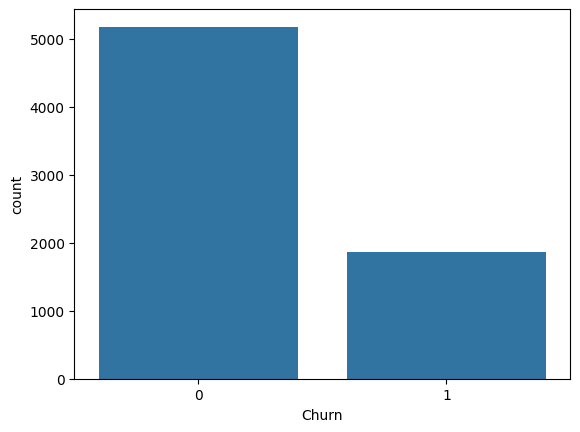

In [16]:
#variável target está desbalanceada
import seaborn as sns
%matplotlib inline
ax = sns.countplot(x='Churn', data=dados_final)

In [17]:
dados_final.Churn.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [18]:
#biblioteca para balancear os dados utilizando over_sampling
from imblearn.over_sampling import SMOTE

In [19]:
#dividindo os dados em caracteristicas e target
X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [20]:
smt = SMOTE(random_state=123)
X, y = smt.fit_resample(X, y)

In [21]:
#junção dos dados balanceados
dados_final = pd.concat([X, y], axis=1)

In [22]:
#verificação 1 - junção dos dados
dados_final.head(2)

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,1,0,0,1,0,1,29.85,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,0
1,0,0,1,0,0,34,56.95,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False,0


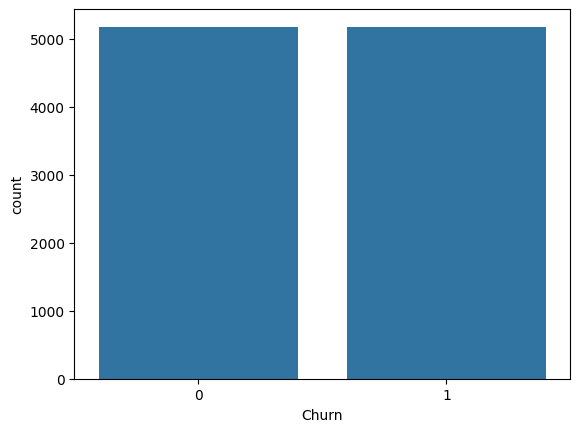

In [23]:
#verificação 2 - balanceamento
ax = sns.countplot(x='Churn', data=dados_final)

In [24]:
dados_final.Churn.value_counts()

Churn
0    5174
1    5174
Name: count, dtype: int64

# Aula 2 - Método baseado na proximidade

## 2.1 - Modelo K-nearest neighbors (KNN)

(Slides)

## 2.2 - KNN por trás dos panos

In [25]:
Xmaria

[[0,
  0,
  1,
  1,
  0,
  0,
  39.9,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1]]

In [26]:
#ymaria = ?

In [27]:
#Divisão em inputs e outputs
X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [28]:
#biblioteca para padronizar os dados
from sklearn.preprocessing import StandardScaler

In [29]:
norm = StandardScaler()

X_normalizado = norm.fit_transform(X)
X_normalizado

array([[ 1.26516933, -0.52756038, -3.06083934, ...,  1.05382378,
        -0.54742438, -0.5311508 ],
       [-0.79040803, -0.52756038,  0.32670777, ..., -0.94892525,
         1.82673633, -0.5311508 ],
       [-0.79040803, -0.52756038,  0.32670777, ..., -0.94892525,
         1.82673633, -0.5311508 ],
       ...,
       [-0.79040803, -0.52756038,  0.32670777, ...,  1.05382378,
        -0.54742438, -0.5311508 ],
       [-0.79040803, -0.52756038,  0.32670777, ..., -0.94892525,
        -0.54742438, -0.5311508 ],
       [-0.79040803, -0.52756038,  0.32670777, ..., -0.94892525,
        -0.54742438, -0.5311508 ]])

In [30]:
X_normalizado[0]

array([ 1.26516933, -0.52756038, -3.06083934,  0.81449258, -0.41350409,
       -1.10772423, -1.32176271, -0.99614196,  3.06083934, -0.93558385,
        1.48315631, -1.05853285, -0.44850949,  0.77851405, -0.44850949,
       -0.59625062, -1.09729069, -0.44850949,  1.35121363,  0.91935908,
       -0.44850949, -0.73960631,  0.78557474, -0.44850949, -0.60652979,
        1.08919748, -0.44850949, -0.84605064,  1.10588699, -0.44850949,
       -0.85821499, -0.4605816 ,  0.68807296, -0.47286547, -0.50805069,
        1.05382378, -0.54742438, -0.5311508 ])

In [31]:
Xmaria_normalizado = norm.transform(pd.DataFrame(Xmaria, columns = X.columns))
Xmaria_normalizado

array([[-0.79040803, -0.52756038,  0.32670777,  0.81449258, -0.41350409,
        -1.14938871, -0.97235545,  1.00387298, -0.32670777, -0.93558385,
        -0.67423777,  0.94470379, -0.44850949,  0.77851405, -0.44850949,
        -0.59625062, -1.09729069, -0.44850949,  1.35121363,  0.91935908,
         2.22960721, -0.73960631, -1.27295335,  2.22960721, -0.60652979,
         1.08919748, -0.44850949, -0.84605064, -0.90425153, -0.44850949,
         1.16520919, -0.4605816 , -1.45333425,  2.1147664 , -0.50805069,
        -0.94892525, -0.54742438,  1.88270449]])

Distância Euclidiana:

$$\sqrt{\sum_{i=1}^k(a_{i}-b_{i})^2}$$

In [32]:
import numpy as np

In [33]:
a = Xmaria_normalizado

In [34]:
b = X_normalizado[0]

In [35]:
#1 - começamos subtraindo 
a - b

array([[-2.05557736,  0.        ,  3.38754711,  0.        ,  0.        ,
        -0.04166448,  0.34940726,  2.00001494, -3.38754711,  0.        ,
        -2.15739408,  2.00323664,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         2.6781167 ,  0.        , -2.05852809,  2.6781167 ,  0.        ,
         0.        ,  0.        ,  0.        , -2.01013852,  0.        ,
         2.02342419,  0.        , -2.14140721,  2.58763186,  0.        ,
        -2.00274904,  0.        ,  2.41385529]])

In [36]:
#2 - depois realizamos a exponenciação
np.square(a-b)

array([[4.22539829e+00, 0.00000000e+00, 1.14754754e+01, 0.00000000e+00,
        0.00000000e+00, 1.73592848e-03, 1.22085433e-01, 4.00005977e+00,
        1.14754754e+01, 0.00000000e+00, 4.65434920e+00, 4.01295706e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        7.17230906e+00, 0.00000000e+00, 4.23753791e+00, 7.17230906e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.04065686e+00, 0.00000000e+00, 4.09424544e+00, 0.00000000e+00,
        4.58562485e+00, 6.69583866e+00, 0.00000000e+00, 4.01100370e+00,
        0.00000000e+00, 5.82669737e+00]])

In [37]:
#3 - a soma 
np.sum(np.square(a-b))

87.8037594741183

In [38]:
#4 - então tiramos a raiz e temos nossa distância
np.sqrt(91.70603225977928)

9.576326657950807

## 2.3 - Implementando o modelo

In [39]:
#biblioteca para divisão dos dados
from sklearn.model_selection import train_test_split

In [40]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado, y, test_size=0.3, random_state=123)

### Treino e teste 

In [41]:
#biblioteca para criarmos o modelo de machine learning
from sklearn.neighbors import KNeighborsClassifier

In [42]:
#instanciar o modelo (criamos o modelo) - por padrão são 5 vizinhos  
knn = KNeighborsClassifier(metric='euclidean')

In [43]:
#treinando o modelo com os dados de treino
knn.fit(X_treino, y_treino)

KNeighborsClassifier(metric='euclidean')

In [44]:
#testando o modelo com os dados de teste
predito_knn = knn.predict(X_teste)

In [45]:
predito_knn

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

# Aula 3 - Método probabilístico

## 3.1 - Teorema de Naive Bayes 

(slides)

## 3.2 - Modelo Bernoulli Naive Bayes

(slides)

## 3.3 - Treinamento e teste

In [46]:
#biblioteca para criarmos o modelo de machine learning
from sklearn.naive_bayes import BernoulliNB

In [47]:
#criamos o modelo


In [48]:
#escolho utilizar mediana, porque é o valor central dos nossos dados ordenados


-0.44850949388572553

array([[-0.79040803, -0.52756038, -3.06083934, ..., -0.94892525,
         1.82673633, -0.5311508 ],
       [ 1.26516933,  1.89551764,  0.32670777, ..., -0.94892525,
         1.82673633, -0.5311508 ],
       [-0.79040803, -0.52756038,  0.32670777, ...,  1.05382378,
        -0.54742438, -0.5311508 ],
       ...,
       [ 1.26516933,  1.89551764,  0.32670777, ..., -0.94892525,
         1.82673633, -0.5311508 ],
       [ 1.26516933,  1.89551764,  0.32670777, ...,  1.05382378,
        -0.54742438, -0.5311508 ],
       [-0.79040803, -0.52756038,  0.32670777, ...,  1.05382378,
        -0.54742438, -0.5311508 ]])

4831    0
5077    0
9023    1
4424    1
5236    0
       ..
9785    1
7763    1
5218    0
1346    1
3582    0
Name: Churn, Length: 7243, dtype: int64

In [51]:
#treinar o modelo
bnb.fit(X_treino, y_treino)

InvalidParameterError: The 'binarize' parameter of BernoulliNB must be None or a float in the range [0.0, inf). Got -0.44 instead.

In [ ]:
#testar o modelo
predito_BNb = bnb.predict(X_teste)

In [ ]:
predito_BNb

array([1, 0, 0, ..., 1, 1, 1])